In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("synthetic_boxoffice_data_with_verdict.csv")
df.head()

,Movie,IndiaNet,IndiaGross,Overseas,Worldwide,imdb_id,tmdb_id,imdb_rating,runtime,rating_count,budget,Verdict
0,Dangal,387.38,538.03,1430.00,1968.03,tt5074352,360814.0,7.887,161.0,1054.0,10400000.0,Blockbuster
1,Jawan,643.87,761.98,386.34,1148.32,tt15354916,872906.0,7.112,169.0,286.0,36150000.0,Blockbuster
2,Pathaan,543.05,654.28,396.02,1050.30,tt12844910,864692.0,6.400,146.0,212.0,30270000.0,Blockbuster
3,Bajrangi Bhaijaan,320.34,444.92,473.26,918.18,tt3863552,348892.0,7.800,159.0,502.0,13000000.0,Blockbuster
4,Animal,556.36,662.33,255.49,917.82,tt13751694,781732.0,6.200,201.0,149.0,13000000.0,Blockbuster


In [3]:
df["Verdict"].unique()

array(['Blockbuster', 'Super Hit', 'Flop', 'Hit', 'Average', 'Disaster'],
      dtype=object)

In [4]:
df.shape

(1157, 12)

In [5]:
df.drop(df[df["Verdict"]== "0"].index, axis = 0, inplace = True)

In [6]:
df.shape

(1157, 12)

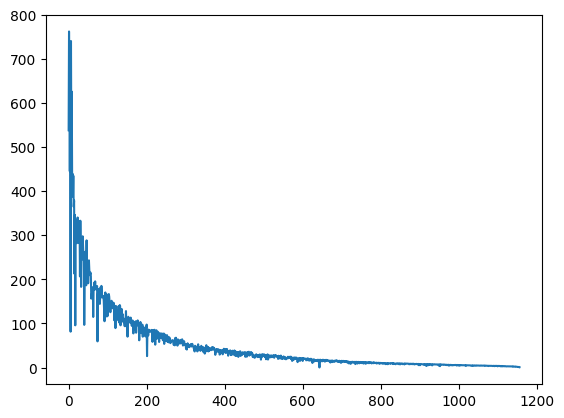

In [7]:
plt.plot(df["IndiaGross"])
plt.show()

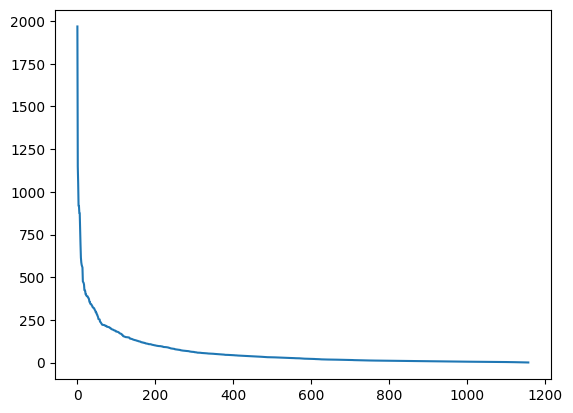

In [8]:
plt.plot(df["Worldwide"])
plt.show()

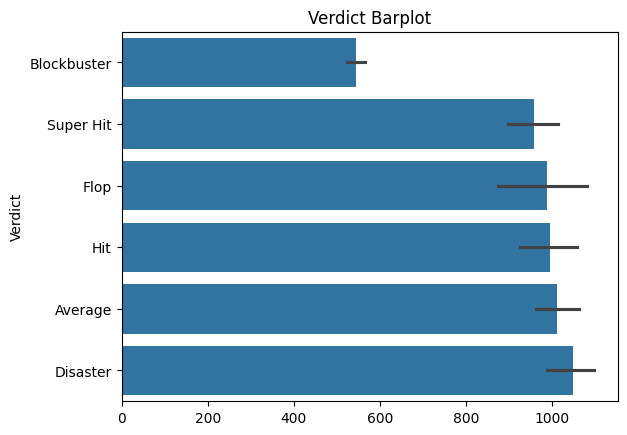

In [9]:
sns.barplot(df["Verdict"])
plt.title("Verdict Barplot")
plt.show()

In [10]:
df.describe()

,IndiaNet,IndiaGross,Overseas,Worldwide,tmdb_id,imdb_rating,runtime,rating_count,budget
count,1157.000000,1157.000000,1157.000000,1157.000000,5.550000e+02,1157.000000,1157.000000,1157.000000,1.157000e+03
mean,37.737312,49.297692,15.022627,64.503682,4.682578e+05,6.152008,135.837079,1422.722558,1.249876e+07
std,63.724617,79.952814,58.804093,124.195882,3.443896e+05,1.102280,24.524378,22193.588358,2.047959e+07
min,0.050000,0.060000,0.030000,1.120000,8.079000e+03,2.300000,1.000000,1.000000,5.000000e+00
25%,6.000000,8.110000,0.590000,8.920000,2.047260e+05,5.470000,125.000000,50.000000,3.000000e+06
50%,15.170000,20.250000,3.020000,23.650000,4.410710e+05,6.200000,138.000000,50.000000,6.500000e+06
75%,40.290000,53.400000,11.380000,65.640000,6.527470e+05,6.907000,150.000000,58.000000,1.300000e+07
max,643.870000,761.980000,1430.000000,1968.030000,1.507649e+06,9.400000,201.000000,702839.000000,2.390000e+08


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1157 entries, 0 to 1156
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Movie         1157 non-null   object 
 1   IndiaNet      1157 non-null   float64
 2   IndiaGross    1157 non-null   float64
 3   Overseas      1157 non-null   float64
 4   Worldwide     1157 non-null   float64
 5   imdb_id       1157 non-null   object 
 6   tmdb_id       555 non-null    float64
 7   imdb_rating   1157 non-null   float64
 8   runtime       1157 non-null   float64
 9   rating_count  1157 non-null   float64
 10  budget        1157 non-null   float64
 11  Verdict       1157 non-null   object 
dtypes: float64(9), object(3)
memory usage: 108.6+ KB


In [12]:
df.isna().sum()

,0
Movie,0
IndiaNet,0
IndiaGross,0
Overseas,0
Worldwide,0
imdb_id,0
tmdb_id,602
imdb_rating,0
runtime,0
rating_count,0


In [13]:
df.drop(['Movie',"imdb_id","tmdb_id","IndiaNet","Worldwide","budget"],axis = 1, inplace = True)

Since India Gross = India Net * Tax

Also removing "Worldwide" and "budget" since verdict is calculated using this.

In [14]:
df[df.isna().any(axis=1)]

,IndiaGross,Overseas,imdb_rating,runtime,rating_count,Verdict


# Choosing dependent and independent variable

In [16]:
y = df.iloc[:,[5]]
y.head()

,Verdict
0,Blockbuster
1,Blockbuster
2,Blockbuster
3,Blockbuster
4,Blockbuster


In [17]:
X = df.drop(['Verdict'], axis = 1)
X.head()

,IndiaGross,Overseas,imdb_rating,runtime,rating_count
0,538.03,1430.00,7.887,161.0,1054.0
1,761.98,386.34,7.112,169.0,286.0
2,654.28,396.02,6.400,146.0,212.0
3,444.92,473.26,7.800,159.0,502.0
4,662.33,255.49,6.200,201.0,149.0


# Getting dummy for categorical data

In [18]:
# Getting dummy for dependent data
y = pd.get_dummies(y, drop_first= True)
y.head()

,Verdict_Blockbuster,Verdict_Disaster,Verdict_Flop,Verdict_Hit,Verdict_Super Hit
0,True,False,False,False,False
1,True,False,False,False,False
2,True,False,False,False,False
3,True,False,False,False,False
4,True,False,False,False,False


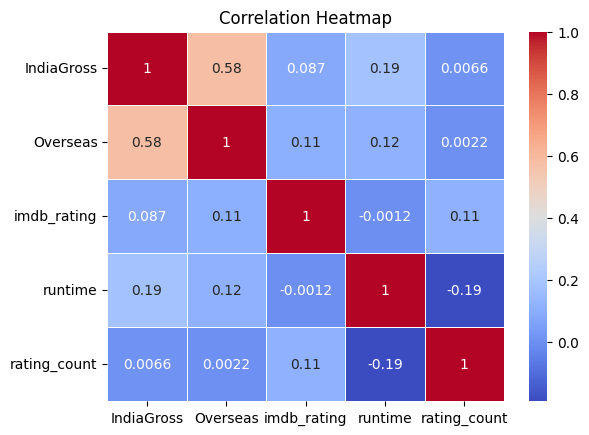

In [19]:
# correlation heatmap
cor = X.corr()
sns.heatmap(cor, annot = True, linewidths= 0.5,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Train test split

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [21]:
scaler = StandardScaler()

In [22]:
X_train,X_test,y_train, y_test = train_test_split(X, y, train_size= 0.8, random_state= 42)

In [23]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [24]:
X_train = pd.DataFrame(X_train, columns = X.columns)
X_test = pd.DataFrame(X_test, columns = X.columns)
X_train.head()

,IndiaGross,Overseas,imdb_rating,runtime,rating_count
0,1.301843,1.069587,0.258998,0.873566,-0.058893
1,-0.098310,-0.041128,0.761233,-0.995857,-0.065169
2,0.039268,-0.217826,0.480833,-1.035632,-0.032495
3,-0.513603,-0.241986,0.761233,0.316716,-0.065169
4,0.794790,1.470355,1.676967,1.151990,-0.012048


In [25]:
X_test.head()

,IndiaGross,Overseas,imdb_rating,runtime,rating_count
0,-0.591583,-0.347353,0.813278,0.319112,-0.093357
1,0.149319,0.040093,-0.955985,0.548320,-0.097933
2,1.274246,0.574934,0.341541,-0.093461,-0.086602
3,0.019944,0.003601,-0.776946,0.227429,-0.093357
4,-0.552559,-0.269522,-2.204225,-1.835440,-0.065466


In [26]:
X_test.shape, y_test.shape

((232, 5), (232, 5))

In [27]:
X_train.shape, y_train.shape

((925, 5), (925, 5))

# Biulding Neural Network

In [28]:
import tensorflow

In [29]:
from tensorflow import keras
from keras import Sequential
from tensorflow.keras.layers import Dense

In [30]:
from tensorflow.keras.layers import Dropout

model = Sequential()
model.add(Dense(14, activation = "relu", input_dim = X_train.shape[1])) # Increased neurons in the first layer
model.add(Dropout(0.2)) # Added dropout layer
model.add(Dense(9, activation = "relu")) # Added a second hidden layer
model.add(Dense(y_train.shape[1], activation="softmax")) # Output layer with softmax

In [31]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 14)             │            84 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 9)              │           135 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │            50 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 269 (1.05 KB)

 Trainable params: 269 (1.05 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer = Adam(learning_rate=0.1), loss = "categorical_crossentropy", metrics = ["accuracy"])

In [33]:
history = model.fit(X_train,y_train, epochs=300, validation_split=0.2)

Epoch 1/300
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.8520 - loss: 0.6804 - val_accuracy: 0.9459 - val_loss: 0.2642
Epoch 2/300
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9495 - loss: 0.2589 - val_accuracy: 0.9459 - val_loss: 0.2759
Epoch 3/300
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9517 - loss: 0.2487 - val_accuracy: 0.9459 - val_loss: 0.2493
Epoch 4/300
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9407 - loss: 0.2763 - val_accuracy: 0.9459 - val_loss: 0.3014
Epoch 5/300
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9497 - loss: 0.2613 - val_accuracy: 0.9459 - val_loss: 0.2653
Epoch 6/300
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9451 - loss: 0.2925 - val_accuracy: 0.9459 - val_loss: 0.2478
Epoch 7/300
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9345 - loss: 0.4160 - val_accuracy: 0.9459 - val_loss: 2.7698
Epoch 8/300
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9068 - loss: 1.4463 - val_accuracy: 0.9459 -

In [34]:
model.layers[0].get_weights()

[array([[-439.55145   , -454.08597   , -455.27884   , -459.2918    ,
         -426.92935   , -486.60876   , -455.60004   , -449.7536    ,
         -472.71405   , -492.0331    , -451.216     , -466.9761    ,
         -436.8567    , -434.19485   ],
        [-453.83063   , -459.20404   , -459.39172   , -463.28613   ,
         -443.2643    , -487.05365   , -458.12607   , -456.81522   ,
         -472.384     , -491.37143   , -458.26602   , -471.56955   ,
         -445.13876   , -441.04382   ],
        [ 412.72714   ,  424.14725   ,  420.57928   ,  425.8076    ,
          405.83978   ,  121.7597    ,  416.13318   ,  428.27563   ,
          143.23257   ,  123.59947   ,  420.62433   ,  436.6757    ,
          413.50027   ,  396.17438   ],
        [  -6.243104  ,    3.8322446 ,    4.9027624 ,    3.3874843 ,
           14.382773  , -148.51257   ,   -1.2127597 ,    9.460572  ,
         -105.20214   , -155.78474   ,    5.1101694 ,   -7.537322  ,
           -0.86206776,   -7.875644  ],
        [ -2

In [35]:
prob = model.predict(X_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


In [36]:
prob

array([[0.99999994, 0.        , 0.        , 0.        , 0.        ],
       [0.99999994, 0.        , 0.        , 0.        , 0.        ],
       [0.99999994, 0.        , 0.        , 0.        , 0.        ],
       ...,
       [0.99999994, 0.        , 0.        , 0.        , 0.        ],
       [0.99999994, 0.        , 0.        , 0.        , 0.        ],
       [0.99999994, 0.        , 0.        , 0.        , 0.        ]],
      dtype=float32)

In [37]:
prob.shape

(232, 5)

In [38]:
y_pred = np.zeros_like(prob)
y_pred[np.arange(len(prob)), np.argmax(prob, axis=1)] = 1

In [39]:
y_pred = y_pred.astype(bool)
y_pred

array([[ True, False, False, False, False],
       [ True, False, False, False, False],
       [ True, False, False, False, False],
       ...,
       [ True, False, False, False, False],
       [ True, False, False, False, False],
       [ True, False, False, False, False]])

In [40]:
from sklearn.metrics import accuracy_score, classification_report

In [42]:
accuracy_score(y_test, y_pred)

0.9353448275862069

In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       217
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         5

   micro avg       0.94      0.95      0.94       228
   macro avg       0.19      0.20      0.19       228
weighted avg       0.89      0.95      0.92       228
 samples avg       0.94      0.94      0.94       228



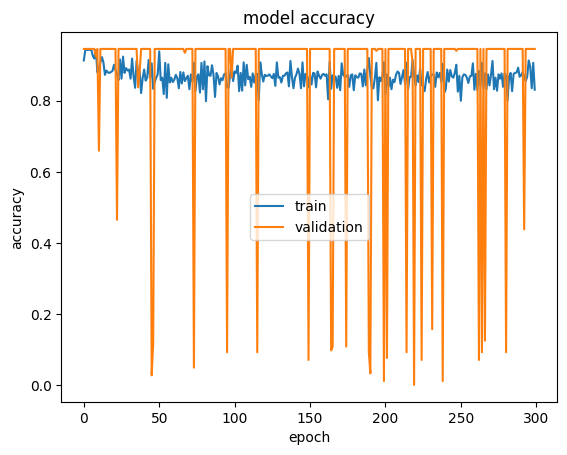

In [44]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train', 'validation'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

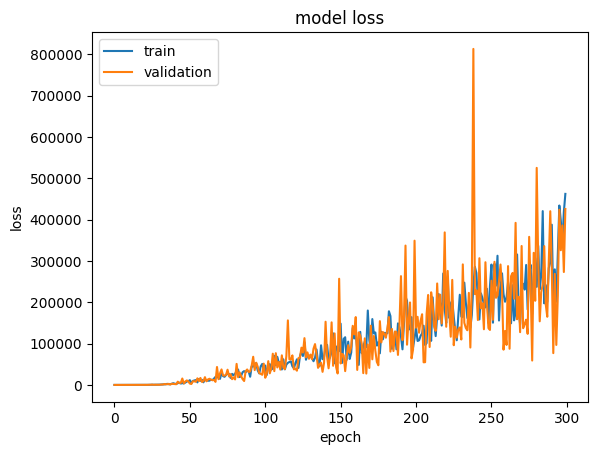

In [45]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'validation'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

# KNN

In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [47]:
KNN_classifier = KNeighborsClassifier()

In [48]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

In [49]:
KNN_model = GridSearchCV(KNN_classifier, param_grid, cv=5)
KNN_model

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9, 11, 13], 'p': [1, 2],
                         'weights': ['uniform', 'distance']})

In [50]:
KNN_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9, 11, 13], 'p': [1, 2],
                         'weights': ['uniform', 'distance']})

In [51]:
KNN_model.best_params_

{'algorithm': 'auto',
 'metric': 'euclidean',
 'n_neighbors': 13,
 'p': 1,
 'weights': 'uniform'}

In [52]:
KNN_model.best_score_

np.float64(0.9243243243243244)

In [53]:
y_pred_KNN = KNN_model.predict(X_test)
y_pred_KNN

array([[ True, False, False, False, False],
       [ True, False, False, False, False],
       [ True, False, False, False, False],
       ...,
       [ True, False, False, False, False],
       [ True, False, False, False, False],
       [ True, False, False, False, False]])

In [54]:
accuracy_score(y_test, y_pred_KNN)

0.9353448275862069

In [55]:
print(classification_report(y_test, y_pred_KNN))


              precision    recall  f1-score   support

           0       0.94      1.00      0.97       217
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         5

   micro avg       0.94      0.95      0.94       228
   macro avg       0.19      0.20      0.19       228
weighted avg       0.89      0.95      0.92       228
 samples avg       0.94      0.94      0.94       228



  # Descision Tree

In [56]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [57]:
tree_classifier = DecisionTreeClassifier()

In [58]:
tree_parameters = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [59]:
tree_model = GridSearchCV(tree_classifier,param_grid= tree_parameters, cv=5)
tree_model

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [60]:
tree_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [61]:
tree_model.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'splitter': 'random'}

In [62]:
tree_model.best_score_

np.float64(0.9243243243243244)

In [63]:
tree_model.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=2,
                       min_samples_split=10, splitter='random')

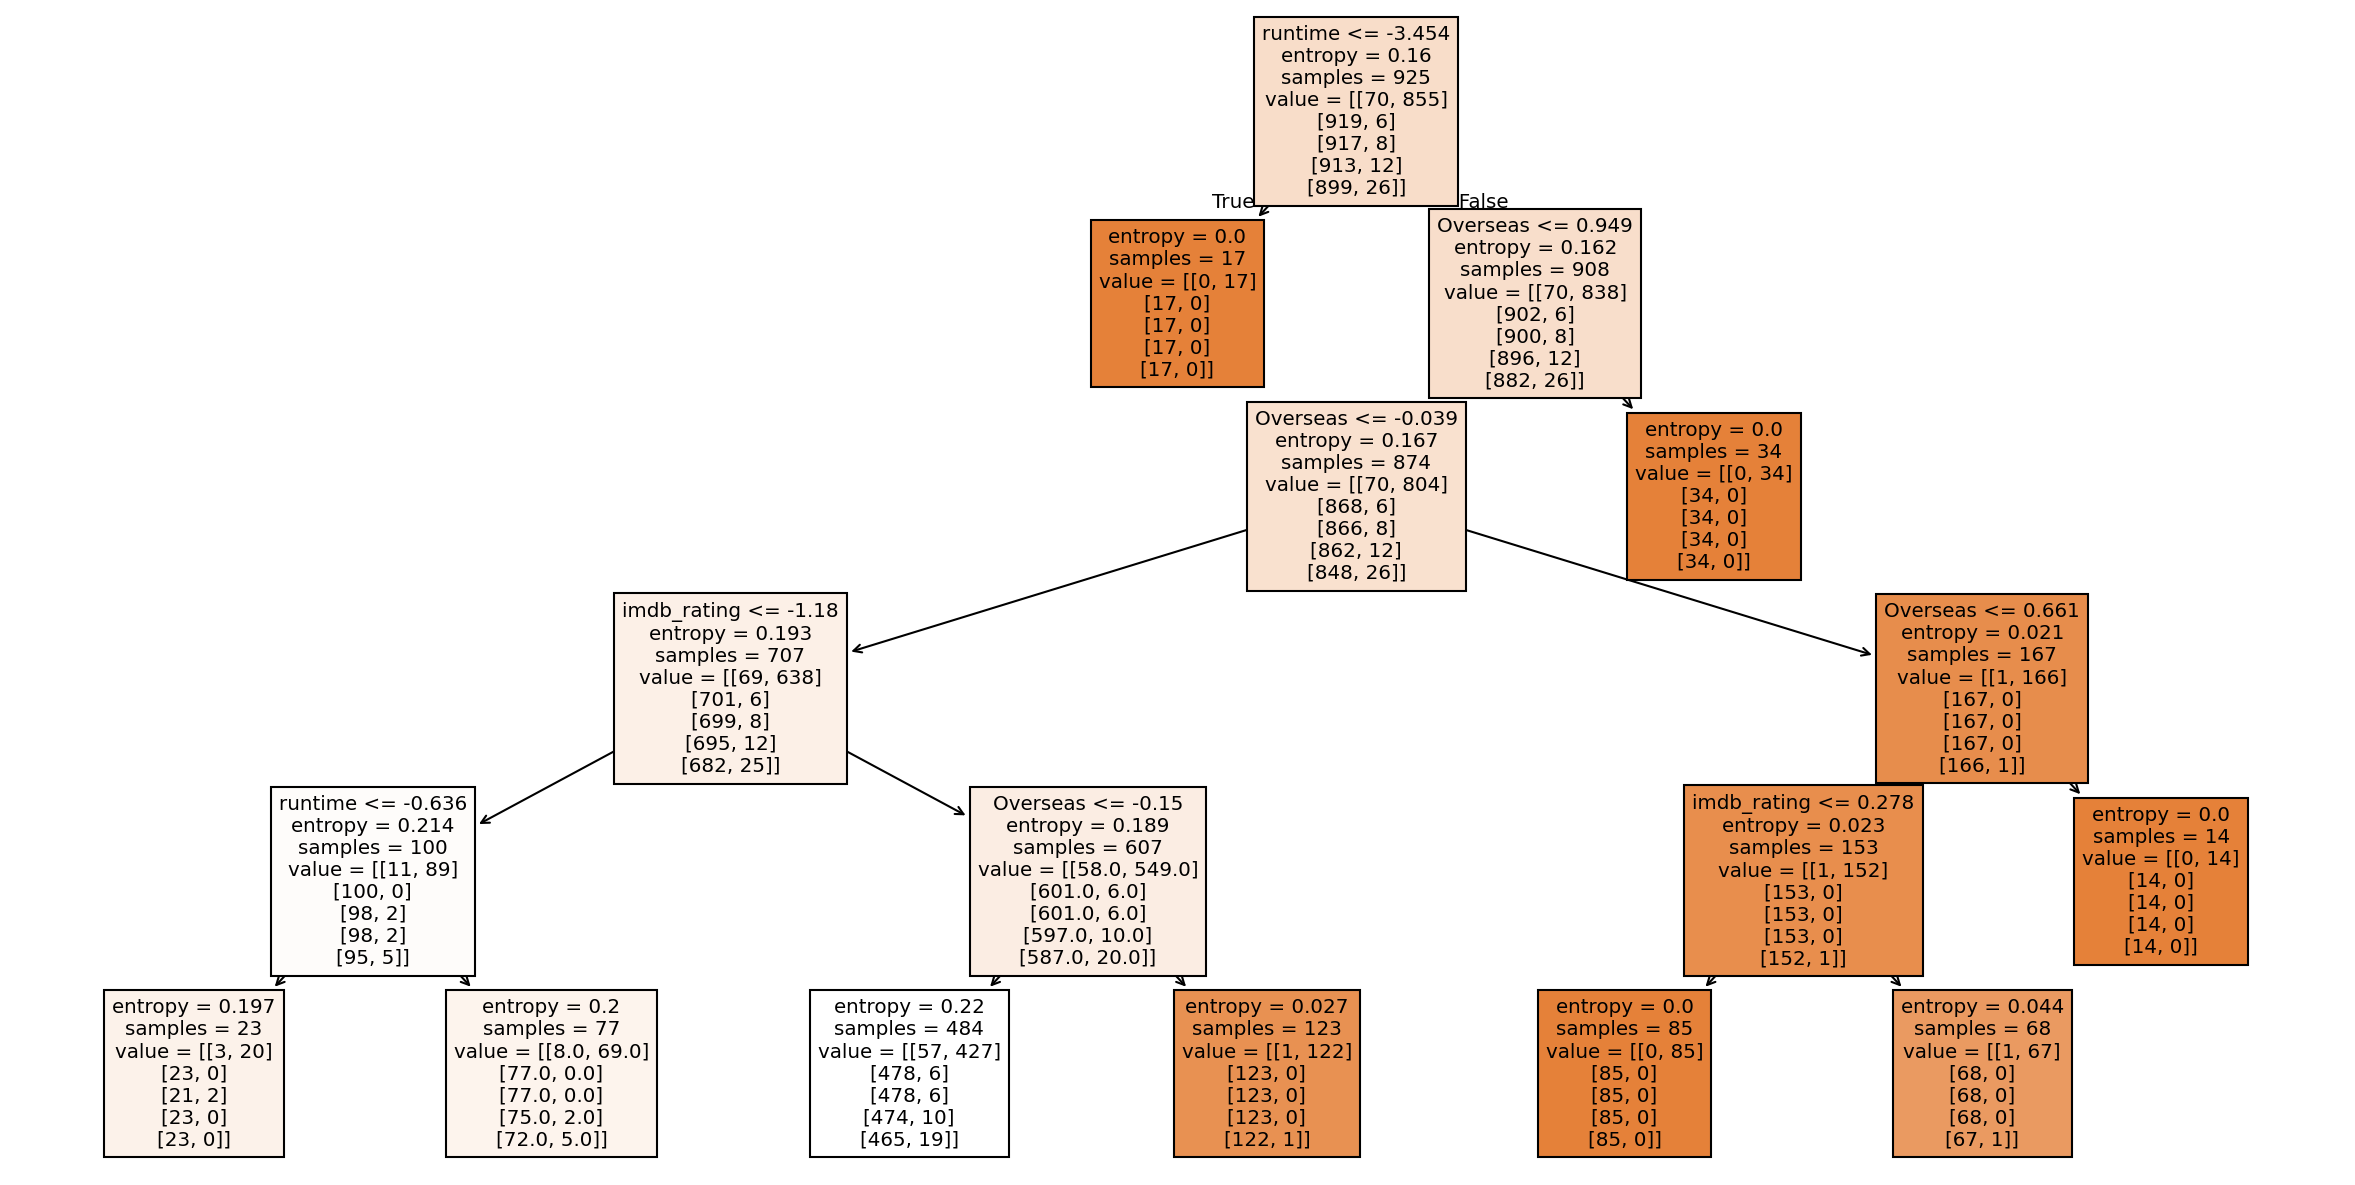

In [64]:
plt.figure(figsize=(20, 10), dpi=150)
plot_tree(tree_model.best_estimator_, filled=True, feature_names=X.columns, class_names=[str(c) for c in tree_model.classes_])
plt.show()

In [65]:
y_pred_tree = tree_model.predict(X_test)
y_pred_tree

array([[ True, False, False, False, False],
       [ True, False, False, False, False],
       [ True, False, False, False, False],
       ...,
       [ True, False, False, False, False],
       [ True, False, False, False, False],
       [ True, False, False, False, False]])

In [66]:
accuracy_score(y_test, y_pred_tree)

0.9353448275862069

In [67]:
print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       217
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         5

   micro avg       0.94      0.95      0.94       228
   macro avg       0.19      0.20      0.19       228
weighted avg       0.89      0.95      0.92       228
 samples avg       0.94      0.94      0.94       228



# Random Forest

In [68]:
from sklearn.ensemble import RandomForestClassifier

In [69]:
Rf_classifier = RandomForestClassifier()

In [70]:
Rf_parameters = {
    'n_estimators': [50, 100, 150, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [71]:
Rf_model = GridSearchCV(Rf_classifier,param_grid= Rf_parameters, cv=5)
Rf_model

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150, 200]})

In [72]:
Rf_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150, 200]})

In [73]:
Rf_model.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 100}

In [74]:
Rf_model.best_score_

np.float64(0.9232432432432433)

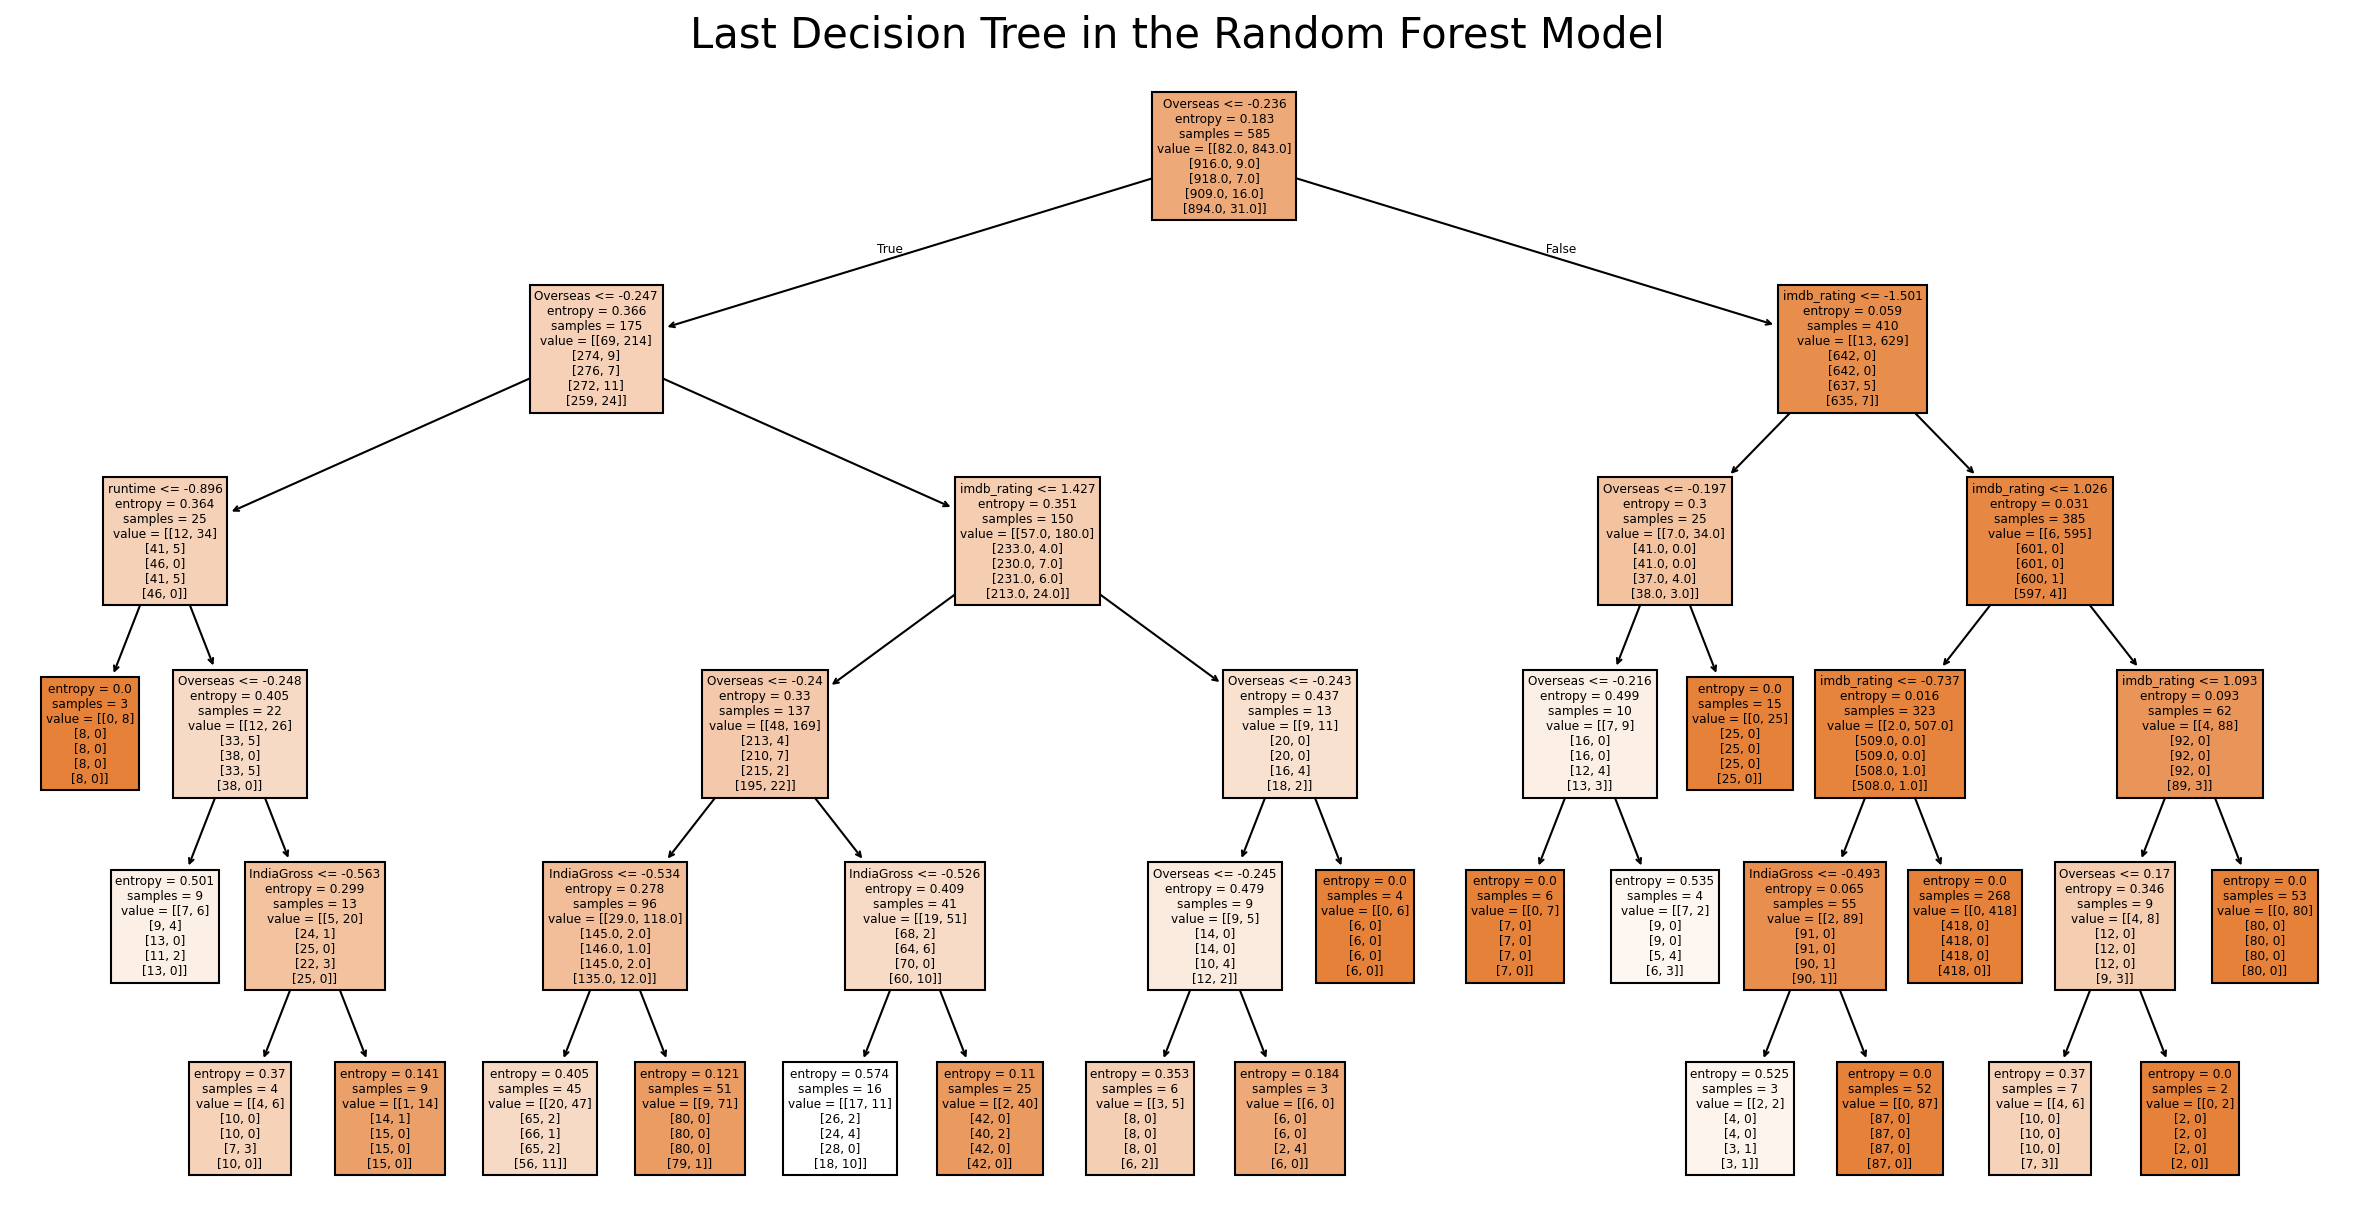

In [75]:
# The last descison tree in the Random Forest Model
plt.figure(figsize=(20, 10), dpi=150)
plot_tree(Rf_model.best_estimator_.estimators_[49], filled=True, feature_names=X.columns, class_names=[str(c) for c in Rf_model.classes_])
plt.title("Last Decision Tree in the Random Forest Model", size = 20)
plt.show()

In [76]:
y_pred_rf = Rf_model.predict(X_test)

In [77]:
accuracy_score(y_test, y_pred_rf)

0.9310344827586207

In [78]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.94      1.00      0.96       217
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         5

   micro avg       0.94      0.95      0.94       228
   macro avg       0.19      0.20      0.19       228
weighted avg       0.89      0.95      0.92       228
 samples avg       0.93      0.93      0.93       228

